## Introduction to Slicing and Primed_Utils
This notebook demonstrates the improvements of version 0.1.0 compared to the previous version shown in usage_tutorial.ipynb. Specifically, this notebook introduces the usage of the added slicing funcionality and primed_utils module. For a more advanced example of using version 0.1.0 for data processing see https://github.com/seanbuchanan-eng/battery_sizing_model .

In [28]:
from primed_data_processing.cellbuilder import CellBuilder
from primed_data_processing.arbin_cycler import ArbinBatch, ArbinCell, ArbinCycle, ArbinStep
import primed_data_processing.primed_utils as primed_utils

In [4]:
cell_builder = CellBuilder()
# instantiate a ArbinCell object
cell = ArbinCell(cell_number=1, channel_number=1)
local_datapath = '../test/cycler_testing_data/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16_Channel_1.1.csv'

# select the steps that we want to load
# we select the characterization discharge and degradation CC discharge steps
steps = {
    'characterization': [6,7,10],
    'degradation': [29]
}

# use a method in cell_builder to process the data for us and store in cell.
cell_builder.read_B6_csv_data(cell=cell, file_path=local_datapath, steps=steps)

In [5]:
# access step using loops
for cycle in cell:
    if cycle.cycle_index == 1:
        for step in cycle:
            if step.step_index == 10:
                step.get_data_as_dataframe()

In [6]:
# access step using indices and helper functions
cell.cycles[0].get_step(10)[0].get_data_as_dataframe()

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,10/23/2021 01:03:59.079,38449.2489,5.0013,10.0,1.0,4.156273,-1.391853,3.218330e-09,0.001920,1.348050e-08,0.007989,,0.0,-0.001279,18.678576
1,10/23/2021 01:04:04.079,38454.2486,10.0010,10.0,1.0,4.151501,-1.391792,3.218330e-09,0.003853,1.348050e-08,0.016019,,0.0,-0.000856,18.697382
2,10/23/2021 01:04:09.079,38459.2485,15.0009,10.0,1.0,4.148088,-1.389793,3.218330e-09,0.005780,1.348050e-08,0.024011,,0.0,-0.000664,18.680519
3,10/23/2021 01:04:14.079,38464.2487,20.0011,10.0,1.0,4.145059,-1.389801,3.218330e-09,0.007712,1.348050e-08,0.032025,,0.0,-0.000587,18.709468
4,10/23/2021 01:04:19.078,38469.2478,25.0002,10.0,1.0,4.142507,-1.389542,3.218330e-09,0.009643,1.348050e-08,0.040024,,0.0,-0.000484,18.698135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,10/23/2021 03:54:24.080,48674.2497,10230.0021,10.0,1.0,2.549133,-1.386734,3.218330e-09,3.951413,1.348050e-08,14.536233,,0.0,-0.002725,20.031925
2046,10/23/2021 03:54:29.078,48679.2483,10235.0007,10.0,1.0,2.535239,-1.386719,3.218330e-09,3.953342,1.348050e-08,14.541136,,0.0,-0.002894,19.992480
2047,10/23/2021 03:54:34.078,48684.2484,10240.0008,10.0,1.0,2.521005,-1.386993,3.218330e-09,3.955268,1.348050e-08,14.546006,,0.0,-0.002891,20.049487
2048,10/23/2021 03:54:39.079,48689.2489,10245.0013,10.0,1.0,2.506514,-1.386551,3.218330e-09,3.957193,1.348050e-08,14.550844,,0.0,-0.003014,20.043951


In [7]:
# access using slicing
# new way cell[cycle1, step10][first step10 in cycle1]
cell[1,10][0].get_data_as_dataframe()

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,10/23/2021 01:03:59.079,38449.2489,5.0013,10.0,1.0,4.156273,-1.391853,3.218330e-09,0.001920,1.348050e-08,0.007989,,0.0,-0.001279,18.678576
1,10/23/2021 01:04:04.079,38454.2486,10.0010,10.0,1.0,4.151501,-1.391792,3.218330e-09,0.003853,1.348050e-08,0.016019,,0.0,-0.000856,18.697382
2,10/23/2021 01:04:09.079,38459.2485,15.0009,10.0,1.0,4.148088,-1.389793,3.218330e-09,0.005780,1.348050e-08,0.024011,,0.0,-0.000664,18.680519
3,10/23/2021 01:04:14.079,38464.2487,20.0011,10.0,1.0,4.145059,-1.389801,3.218330e-09,0.007712,1.348050e-08,0.032025,,0.0,-0.000587,18.709468
4,10/23/2021 01:04:19.078,38469.2478,25.0002,10.0,1.0,4.142507,-1.389542,3.218330e-09,0.009643,1.348050e-08,0.040024,,0.0,-0.000484,18.698135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,10/23/2021 03:54:24.080,48674.2497,10230.0021,10.0,1.0,2.549133,-1.386734,3.218330e-09,3.951413,1.348050e-08,14.536233,,0.0,-0.002725,20.031925
2046,10/23/2021 03:54:29.078,48679.2483,10235.0007,10.0,1.0,2.535239,-1.386719,3.218330e-09,3.953342,1.348050e-08,14.541136,,0.0,-0.002894,19.992480
2047,10/23/2021 03:54:34.078,48684.2484,10240.0008,10.0,1.0,2.521005,-1.386993,3.218330e-09,3.955268,1.348050e-08,14.546006,,0.0,-0.002891,20.049487
2048,10/23/2021 03:54:39.079,48689.2489,10245.0013,10.0,1.0,2.506514,-1.386551,3.218330e-09,3.957193,1.348050e-08,14.550844,,0.0,-0.003014,20.043951


Generally, data is processed into an ArbinBatch object that holds data from multiple cells. The indexing order when slicing goes as follows: 

batch[cell number, cycle number, step number]. 

Like numpy arrays and pandas dataframes, multiple cells, cycles, and steps can be sliced:

All cells, cycles, and steps -> batch[:,:,:]

Cell1, cycles 1 to 5, and steps 3 to 6 -> batch[1,1:6,3:7]

and so on...

In [8]:
cell.headers

['Date_Time',
 'Test_Time(s)',
 'Step_Time(s)',
 'Step_Index',
 'Cycle_Index',
 'Voltage(V)',
 'Current(A)',
 'Charge_Capacity(Ah)',
 'Discharge_Capacity(Ah)',
 'Charge_Energy(Wh)',
 'Discharge_Energy(Wh)',
 'ACR(Ohm)',
 'Internal Resistance(Ohm)',
 'dV/dt(V/s)',
 'Battery_Temperature(C)']

In [9]:
print(f"Old way: {cell.cycles[0].get_step(10)[0].data_dict.keys()}")
print(f"New way: {cell[1,10][0].data_dict.keys()}")

Old way: dict_keys(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'ACR(Ohm)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Battery_Temperature(C)'])
New way: dict_keys(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'ACR(Ohm)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Battery_Temperature(C)'])


In [10]:
# Get step old way
step = cell.cycles[0].get_step(10)[0]
# Get step new way
step = cell[1,10][0]

# Get voltage data from the step
step['Voltage(V)'][0:5]

[4.156272888, 4.151501179, 4.148087502, 4.145059109, 4.142507076]

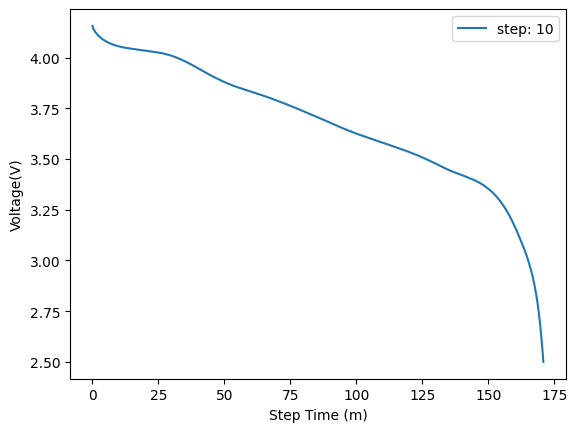

In [11]:
# Get step
step = cell.cycles[0].get_step(10)[0]
# Get step new way
step = cell[1,10][0]

# Plot voltage
step.plot_step_column('Voltage(V)')

## EIS Processing
The gamry_eis module does not support slicing like the Arbin module because it is common for the eis data to be merged with the arbin data, therefore accessing the slicing functionality after merging.

In [16]:
from primed_data_processing.gamry_eis import EisSweep, EisCycle, EisCell

In [17]:
path = '../test/eis_testing_data/B6T10V0_Chan001_Cycle001_Step014.DTA'

# Make EisSweep object to store the data
# from the Arbin data we know that eis steps happen at 50% soc
eis_sweep = EisSweep(name='eis cycle 1', soc=0.5, step_index=14)

# import the data
eis_sweep.read_DTA_file(path)

In [18]:
# Make an EisCycle object
cycle = EisCycle(cycle_number=1, sweeps=[eis_sweep], name='cycle1')

# Make an EisCell object
cell = EisCell(cell_number=1, channel_number=1, name='cell1', eis_cycles=[cycle])

In [19]:
# look at frequencies
cell.cycles[0].sweeps[0].data_dict['Freq (Hz)']

[100019.5,
 46464.84,
 21621.09,
 10019.53,
 4630.335,
 2141.204,
 1000.702,
 463.5989,
 215.0229,
 99.734,
 45.95588,
 21.50229,
 9.9734,
 4.650298,
 2.170139,
 0.997765]

In [20]:
import os

In [21]:
# instantiate CellBuilder
cell_builder = CellBuilder()

# raws_prepath = 'path/to/raws/'
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)

# list for holding processed cells
arbin_cells = []

# loop over channel numbers
for channel_idx, channel in enumerate(channel_numbers):
    print(f'Processing channel {channel}')

    # make subfolder name in raws folder
    folder_name = f'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_{channel}/'

    # append new cell to cells processed cells list
    arbin_cells.append(ArbinCell(cell_numbers[channel_idx], channel))

    # get directory of the current folder
    directory = os.fsencode(raws_prepath+folder_name)

    # sort directory because read_B6_csv_data expects chonologically ordered files
    sorted_dir = sorted(os.listdir(directory), key=lambda file: int(os.fsdecode(file).split('.')[1]))

    # loop over all files in the current directory
    for file in sorted_dir:
        # get filename
        filename = os.fsdecode(file)

        # ignore .xlsx files
        if filename.endswith('.csv'):
            # process file with CellBuilder method
            cell_builder.read_B6_csv_data(
                arbin_cells[channel_idx], # current cell being processed
                raws_prepath+folder_name+filename, # path to file being processed
                {'characterization': [10,13,14]}, # steps to save
                verbose=False # minimal printouts
            )

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16


In [22]:
# Change for your file location
file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)

# list for holding processed cells
eis_cells = []

# loop over all channels in the batch
for channel_idx, channel in enumerate(channel_numbers):
    # initial cycle number
    cycle = 1

    # list for storing processed cycles
    eis_cycles = []

    # loop until cycle number 23.
    while cycle <= 23:

        # make a new EisSweep for every cycle (only 1 sweep per cycle in this case)
        eis_sweep = EisSweep(f'eis cycle{cycle}', 0.5, 14)

        # handle different file and cycle combinations in the .DTA filename.
        if cycle < 10 and channel < 10:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA')
        elif cycle < 10 and channel < 100:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle00{cycle}_Step014.DTA')
        elif cycle < 100 and channel < 10:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle0{cycle}_Step014.DTA')
        elif cycle < 100 and channel < 100:
            eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle0{cycle}_Step014.DTA')
        else:
            print('Cycle number greater than 100!')

        # add a new EisCycle to the cycles list for every cycle
        eis_cycles.append(EisCycle(cycle, [eis_sweep], f'cycle_object_{cycle}'))
        cycle += 2
        
        
    # make the EisCell object with all of the processed data
    eis_cells.append(EisCell(
        name=f'eis step for channel{channel}', 
        eis_cycles=eis_cycles, 
        cell_number=cell_numbers[channel_idx], 
        channel_number=channel)
        )
    # reset the cycles list for the new cell.
    eis_cycles = []

In [23]:
cell_builder.merge_B6_eis_data(eis_cells, arbin_cells)

In [27]:
# old way
max_new_capacity = 4 #Ah
for cell in arbin_cells:
    for cycle in cell:
        #try except block needed to catch the ValueError thrown when a step doesn't exist.
        try:
            if cycle.get_step(10) and cycle.get_step(13) and cycle.get_eis_step(14):
                print(f'Cycle {cycle.cycle_index} SOH: {cycle.get_step(10)[0]["Discharge_Capacity(Ah)"][-1]/max_new_capacity}')
                print(f'Cycle {cycle.cycle_index} Battery Temperature: {cycle.get_step(13)[0]["Battery_Temperature(C)"][-1]}')
                print(f'Cycle {cycle.cycle_index} EIS start frequency: {cycle.get_eis_step(14)[0].data_dict["Freq (Hz)"][0]}')
        except ValueError:
            pass

Cycle 1 SOH: 0.98951172825
Cycle 1 Battery Temperature: 18.74851227
Cycle 1 EIS start frequency: 100019.5
Cycle 3 SOH: 0.969012618
Cycle 3 Battery Temperature: 18.66194916
Cycle 3 EIS start frequency: 100019.5
Cycle 5 SOH: 0.95717233425
Cycle 5 Battery Temperature: 21.62377739
Cycle 5 EIS start frequency: 100019.5
Cycle 7 SOH: 0.94492048025
Cycle 7 Battery Temperature: 21.47348785
Cycle 7 EIS start frequency: 100019.5
Cycle 9 SOH: 0.93622279175
Cycle 9 Battery Temperature: 21.57527924
Cycle 9 EIS start frequency: 100019.5
Cycle 11 SOH: 0.92814069975
Cycle 11 Battery Temperature: 21.60574532
Cycle 11 EIS start frequency: 100019.5
Cycle 13 SOH: 0.92036908875
Cycle 13 Battery Temperature: 21.61019897
Cycle 13 EIS start frequency: 100019.5
Cycle 15 SOH: 0.904498756
Cycle 15 Battery Temperature: 21.66473961
Cycle 15 EIS start frequency: 100019.5
Cycle 17 SOH: 0.9019761085
Cycle 17 Battery Temperature: 21.64170265
Cycle 17 EIS start frequency: 100019.5
Cycle 19 SOH: 0.89721959825
Cycle 19 Ba

In [39]:
# new way
# put cells into a batch for demonstration purposes
batch = ArbinBatch(cells=arbin_cells)
max_new_capacity = 4 #Ah
for cycle in batch[:,:]:
    try:
        print(f'Cycle {cycle.cycle_index} SOH: {cycle[10][0]["Discharge_Capacity(Ah)"][-1]/max_new_capacity}')
        print(f'Cycle {cycle.cycle_index} Battery Temperature: {cycle[13][0]["Battery_Temperature(C)"][-1]}')
        print(f'Cycle {cycle.cycle_index} EIS start frequency: {cycle[14][-1].data_dict["Freq (Hz)"][0]}')
    except (IndexError, KeyError):
        pass

Cycle 1 SOH: 0.9625386595
Cycle 1 Battery Temperature: 19.26230621
Cycle 1 EIS start frequency: 100019.5
Cycle 3 SOH: 0.93146759275
Cycle 3 Battery Temperature: 19.22445488
Cycle 3 EIS start frequency: 100019.5
Cycle 5 SOH: 0.9151145815
Cycle 5 Battery Temperature: 22.11808586
Cycle 5 EIS start frequency: 100019.5
Cycle 7 SOH: 0.90028512475
Cycle 7 Battery Temperature: 22.07843245
Cycle 7 EIS start frequency: 100019.5
Cycle 9 SOH: 0.8879734875
Cycle 9 Battery Temperature: 22.11255836
Cycle 9 EIS start frequency: 100019.5
Cycle 11 SOH: 0.876817584
Cycle 11 Battery Temperature: 22.08132744
Cycle 11 EIS start frequency: 100019.5
Cycle 13 SOH: 0.87799167625
Cycle 13 Battery Temperature: 22.15414238
Cycle 13 EIS start frequency: 100019.5
Cycle 15 SOH: 0.8489522935
Cycle 15 Battery Temperature: 22.13077927
Cycle 15 EIS start frequency: 100019.5
Cycle 17 SOH: 0.85106599325
Cycle 17 Battery Temperature: 22.09515572
Cycle 17 EIS start frequency: 100019.5
Cycle 19 SOH: 0.84075915825
Cycle 19 Bat